In [1]:
#Importing the libraries

from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston    #Loading the boston housing data from datasets
boston = load_boston()                     

In [3]:
boston_data = pd.DataFrame(boston.data) # intializing the dataframe

In [4]:
boston_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_data.columns = boston.feature_names # Showing column names of the DataFrame
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston_data.info() #showing  the summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
boston_data['PRICE'] = boston.target #Adding target variable to dataframe which is the price of the house

In [11]:
boston_data.describe()  # calculating statistical data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
corr = boston_data.corr() # Finding out the correlation between the features
corr.shape

(14, 14)

In [15]:
df = boston_data.drop(['PRICE'],axis=1)   #Splitting the independent variables and dependent(target) variables
target = boston_data['PRICE']

In [16]:
from sklearn.model_selection import train_test_split  #splitting training and testing data 
x_train, x_test, y_train, y_test = train_test_split(df,target,test_size=0.2, random_state=4)

In [17]:
print('No of rows for training',len(x_train))
print('No of rows for testing',len(y_test))

No of rows for training 404
No of rows for testing 102


In [ ]:
  # LINEAR REGRESSION

In [18]:
model = linear_model.LinearRegression()  # Creating Linear Regressor

In [19]:
model.fit(x_train,y_train)  #Training the model using training dataset

LinearRegression()

In [20]:
predict_y = model.predict(x_test) # model prediction on dataset

In [21]:
from sklearn.metrics import mean_squared_error  

In [22]:
mse = mean_squared_error(y_test,predict_y)  #model eveluation for accuracy

In [23]:
rmse = np.sqrt(mse) #Roor mean square erroe

In [24]:
print(rmse)

5.04178412140204


In [26]:
model.score(x_train,y_train) #R square

0.7415244219726307

In [27]:
slope = model.coef_ # calculating slope of the dataframe

In [28]:
intercept = model.intercept_ # calculating intercept of the dataframe

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

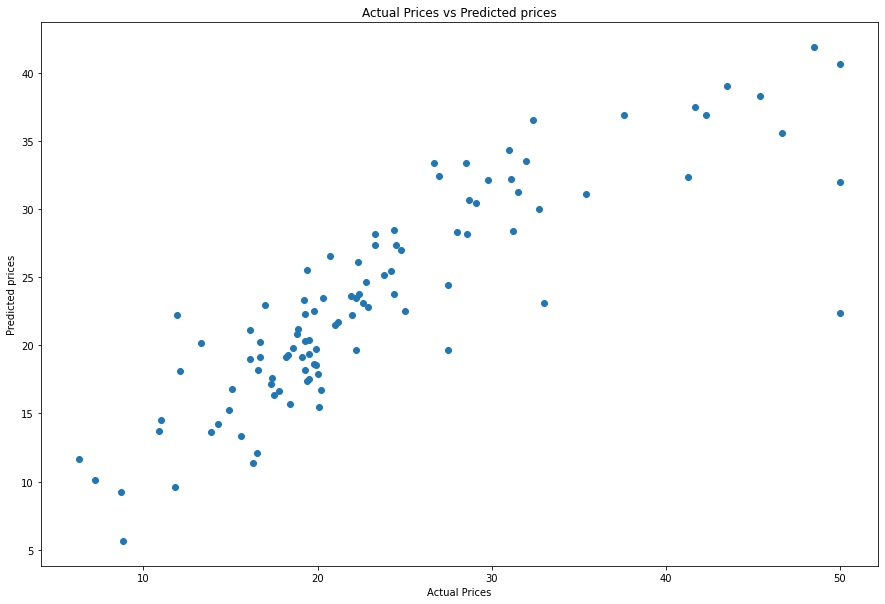

In [31]:
# Visualizing the differences between actual prices and predicted values
plt.figure(figsize=(15,10))
plt.scatter(y_test,predict_y)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")

In [56]:
predicted_value = pd.DataFrame(predict_y)   #calculating difference between the actual values and the predicted values
actual_value= pd.DataFrame(y_test)
sub = pd.DataFrame( y_test - predict_y)

In [68]:
horizontal_stack = pd.concat([actual_value,predicted_value,sub], axis=1)

In [69]:
actual_value.reset_index(drop=True, inplace=True)
predicted_value.reset_index(drop=True, inplace=True)
sub.reset_index(drop=True, inplace=True)

In [70]:
horizontal_stack.columns = ['Actual Value', 'Predicted Value','Difference']

In [72]:
horizontal_stack[0:10] #Difference between the actual values and the predicted values

,Actual Value,Predicted Value,Difference
0,16.5,12.074960,4.425040
1,24.8,26.989497,-2.189497
2,17.4,17.588034,-0.188034
3,19.3,18.155845,1.144155
4,37.6,36.920917,0.679083
5,24.2,25.432674,-1.232674
6,35.4,31.092569,4.307431
7,19.9,19.725499,0.174501
8,27.5,19.661034,7.838966
9,17.0,22.963586,-5.963586
